In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('final_dataset_phase2.csv')

In [3]:
data

,Pregnancies,Glucose,SkinThickness,Insulin,Age,BMIxThickness,BMIxAge,Outcome
0,0.058824,0.232258,0.043478,0.055288,0.016667,0.053481,0.120010,0
1,0.117647,0.483871,0.217391,0.106370,0.850000,0.108738,0.444531,0
2,0.588235,0.458065,0.271739,0.186899,0.150000,0.266408,0.279419,1
3,0.058824,0.883871,0.380435,0.335337,0.016667,0.427961,0.215051,1
4,0.235294,0.341935,0.173913,0.106370,0.016667,0.141859,0.102903,0
...,...,...,...,...,...,...,...,...
763,0.411765,0.864516,0.271739,0.186899,0.333333,0.316117,0.541602,1
764,0.176471,0.541935,0.217391,0.106370,0.566667,0.119972,0.336228,0
765,0.294118,0.283871,0.250000,0.106370,0.266667,0.191623,0.276050,0
766,0.176471,0.277419,0.119565,0.106370,0.000000,0.070791,0.032659,0


Importing Libraries

In [73]:
data[data['Outcome'] == 1].describe()

,Pregnancies,Glucose,SkinThickness,Insulin,Age,BMIxThickness,BMIxAge,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,0.286216,0.634208,0.279040,0.208673,0.267786,0.289330,0.395828,1.0
std,0.220073,0.190250,0.092056,0.113118,0.182804,0.127671,0.175484,0.0
min,0.000000,0.219355,0.000000,0.000000,0.000000,0.015534,0.062424,1.0
25%,0.102941,0.483871,0.250000,0.186899,0.116667,0.221123,0.253013,1.0
50%,0.235294,0.619355,0.271739,0.186899,0.250000,0.263759,0.386038,1.0
75%,0.470588,0.793548,0.315217,0.186899,0.383333,0.342746,0.501847,1.0
max,1.000000,1.000000,1.000000,1.000000,0.816667,1.000000,0.949240,1.0


In [72]:
data[data['Outcome'] == 0].describe()

,Pregnancies,Glucose,SkinThickness,Insulin,Age,BMIxThickness,BMIxAge,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,0.194000,0.429819,0.219239,0.124005,0.169833,0.203207,0.251135,0.0
std,0.177481,0.159380,0.092575,0.090968,0.194461,0.114243,0.176720,0.0
min,0.000000,0.000000,0.000000,0.001202,0.000000,0.000000,0.000000,0.0
25%,0.058824,0.316129,0.163043,0.097356,0.033333,0.125964,0.115582,0.0
50%,0.117647,0.406452,0.217391,0.106370,0.100000,0.185132,0.206584,0.0
75%,0.294118,0.522581,0.260870,0.109375,0.266667,0.255589,0.334521,0.0
max,0.764706,0.987097,0.576087,0.877404,1.000000,0.740860,1.000000,0.0


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

Splitting Data into training and testing sets

In [51]:
from sklearn.model_selection import train_test_split
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#1) KNN

In [52]:
knn = KNeighborsClassifier(n_neighbors=9)                #knn classifier
knn.fit(X_train,Y_train)

knn_acc = accuracy_score(Y_test,knn.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,knn.predict(X_test))*100))

Train Set Accuracy:82.24755700325733
Test Set Accuracy:77.27272727272727


Now we will optimize the hyperparamters using Grid Search and repeat KNN to see if it affects the accuracy scores

In [53]:
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
best_model = grid_search.fit(X_train,Y_train)

In [8]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 19


In [54]:
knn_pred = best_model.predict(X_test)

In [55]:
knn_acc = accuracy_score(Y_test,knn_pred)

In [56]:
knn_acc = accuracy_score(Y_test,best_model.predict(X_test))
print("Train Set Accuracy:"+str(accuracy_score(Y_train,best_model.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,best_model.predict(X_test))*100))

Train Set Accuracy:84.85342019543974
Test Set Accuracy:83.11688311688312


Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        89
           1       0.84      0.74      0.79        65

    accuracy                           0.83       154
   macro avg       0.83      0.82      0.82       154
weighted avg       0.83      0.83      0.83       154



<Axes: >

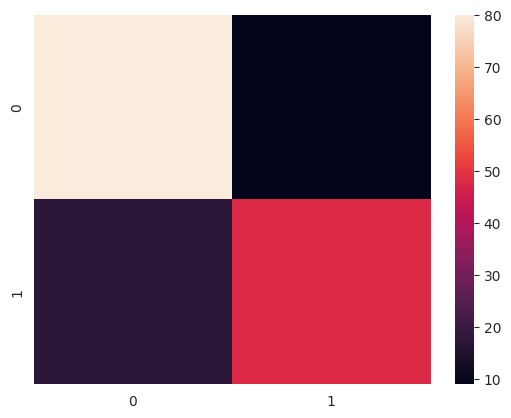

In [57]:
print("Classification Report is:\n",classification_report(Y_test,knn_pred))
sns.heatmap(confusion_matrix(Y_test,knn_pred))

Note that after optimizing the hyperparamters, the accuracy scores improved.

#2) Support Vector Machine

In [13]:
svm = SVC()
svm.fit(X_train,Y_train)

svm_acc= accuracy_score(Y_test,svm.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,svm.predict(X_test))*100))

Train Set Accuracy:83.55048859934854
Test Set Accuracy:78.57142857142857


Now we will optimize the hyperparameters using Grid Search to see if the accuracy scores improve

In [14]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [15]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [16]:
grid_result = grid_search.fit(X, y)

In [17]:
svm_pred=grid_result.predict(X_test)

In [18]:
svm_acc= accuracy_score(Y_test,grid_result.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,grid_result.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,grid_result.predict(X_test))*100))

Train Set Accuracy:91.69381107491856
Test Set Accuracy:93.5064935064935


Classification Report is:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        89
           1       0.97      0.88      0.92        65

    accuracy                           0.94       154
   macro avg       0.94      0.93      0.93       154
weighted avg       0.94      0.94      0.93       154



<Axes: >

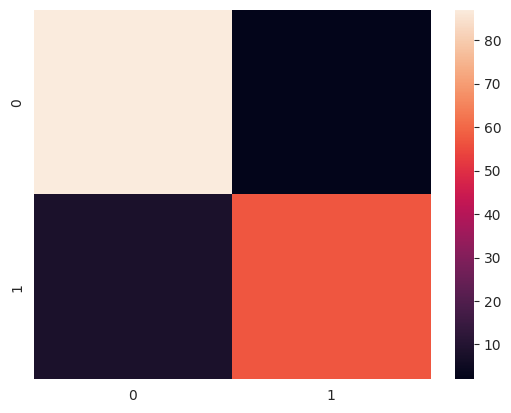

In [58]:
print("Classification Report is:\n",classification_report(Y_test,svm_pred))
sns.heatmap(confusion_matrix(Y_test,svm_pred))

Note that the accuracy scores significantly improved after optimizing the hyperparamters for SVC

#3) Logistic Regression

In [20]:
log_reg = LogisticRegression(C=1,penalty='l2')
log_reg.fit(X_train,Y_train)

log_acc=accuracy_score(Y_test,log_reg.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,log_reg.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,log_reg.predict(X_test))*100))

Train Set Accuracy:78.17589576547232
Test Set Accuracy:74.02597402597402


Classification Report is:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80        89
           1       0.79      0.52      0.63        65

    accuracy                           0.74       154
   macro avg       0.76      0.71      0.71       154
weighted avg       0.75      0.74      0.73       154



<Axes: >

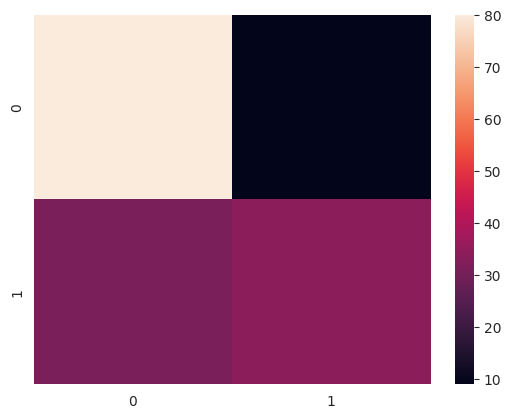

In [59]:
print("Classification Report is:\n",classification_report(Y_test,log_reg.predict(X_test)))
sns.heatmap(confusion_matrix(Y_test,log_reg.predict(X_test)))

#4) Decision Tree

In [22]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(X_train, Y_train)


dtc_acc= accuracy_score(Y_test,dtc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,dtc.predict(X_test))*100))

Train Set Accuracy:92.50814332247556
Test Set Accuracy:87.01298701298701


Now we will optimize the hyperparamters using Grid Search and repeat the Decision Tree to see if it affects the accuracy scores

In [23]:
dt = DecisionTreeClassifier(random_state=42)

In [24]:
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [25]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [26]:
best_model=grid_search.fit(X_train, Y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [27]:
dt_pred=best_model.predict(X_test)

In [28]:
dtc_acc= accuracy_score(Y_test,best_model.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,best_model.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,best_model.predict(X_test))*100))

Train Set Accuracy:91.04234527687296
Test Set Accuracy:88.96103896103897


Classification Report is:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91        89
           1       0.90      0.83      0.86        65

    accuracy                           0.89       154
   macro avg       0.89      0.88      0.89       154
weighted avg       0.89      0.89      0.89       154



<Axes: >

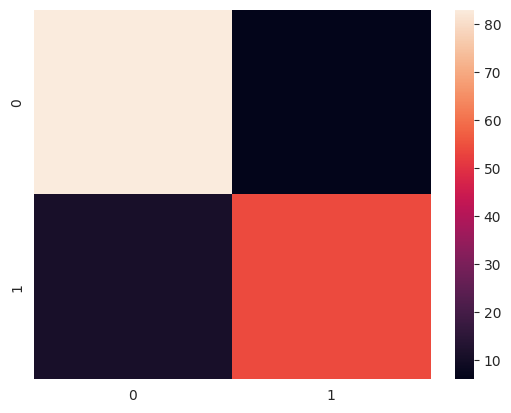

In [60]:
print("Classification Report is:\n",classification_report(Y_test,dt_pred))
sns.heatmap(confusion_matrix(Y_test,dt_pred))

Note that after optimizing the hyperparamters, the accuracy scores slightly improved.

#5) Gradient Boosting

In [30]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)


gbc_acc=accuracy_score(Y_test,gbc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,gbc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,gbc.predict(X_test))*100))

Train Set Accuracy:97.8827361563518
Test Set Accuracy:88.96103896103897


Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        89
           1       0.94      0.78      0.86        65

    accuracy                           0.89       154
   macro avg       0.90      0.88      0.88       154
weighted avg       0.90      0.89      0.89       154



<Axes: >

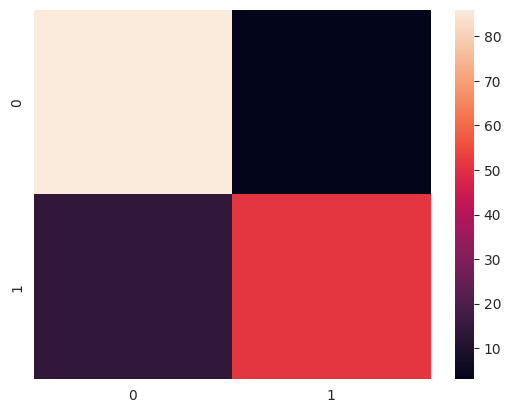

In [61]:
print("Classification Report is:\n",classification_report(Y_test,gbc.predict(X_test)))
sns.heatmap(confusion_matrix(Y_test,gbc.predict(X_test)))

#6) XGB Classifier

In [31]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth=6,n_estimators = 10)
xgb.fit(X_train,Y_train)

xgb_acc= accuracy_score(Y_test,xgb.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,xgb.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,xgb.predict(X_test))*100))

Train Set Accuracy:94.62540716612378
Test Set Accuracy:87.66233766233766


Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        89
           1       0.94      0.75      0.84        65

    accuracy                           0.88       154
   macro avg       0.89      0.86      0.87       154
weighted avg       0.88      0.88      0.87       154



<Axes: >

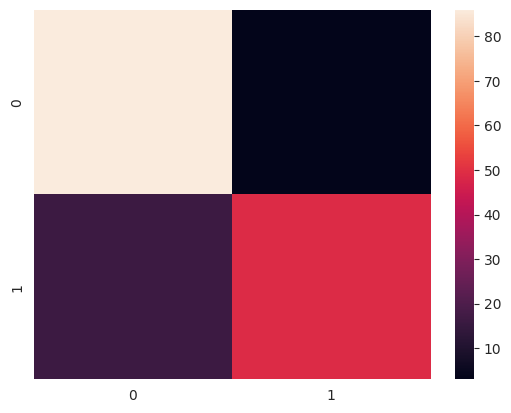

In [62]:
print("Classification Report is:\n",classification_report(Y_test,xgb.predict(X_test)))
sns.heatmap(confusion_matrix(Y_test,xgb.predict(X_test)))

#7) ADA Boost Classifier

In [32]:
ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)

ada_acc= accuracy_score(Y_test,ada.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,ada.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,ada.predict(X_test))*100))

Train Set Accuracy:93.48534201954396
Test Set Accuracy:88.96103896103897


Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91        89
           1       0.93      0.80      0.86        65

    accuracy                           0.89       154
   macro avg       0.90      0.88      0.88       154
weighted avg       0.89      0.89      0.89       154



<Axes: >

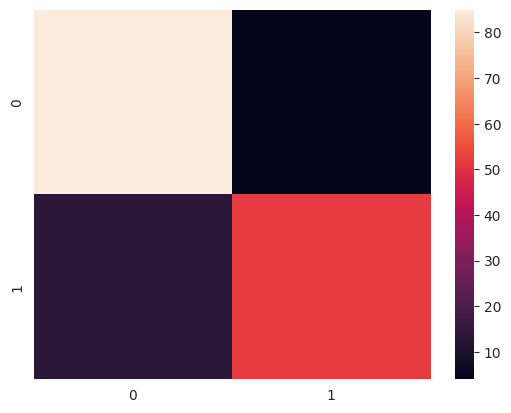

In [63]:
print("Classification Report is:\n",classification_report(Y_test,ada.predict(X_test)))
sns.heatmap(confusion_matrix(Y_test,ada.predict(X_test)))

#8) Random Forest

In [33]:
rforest = RandomForestClassifier()
rforest.fit(X_train,Y_train)

rforest_acc= accuracy_score(Y_test,rforest.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,rforest.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,rforest.predict(X_test))*100))

Train Set Accuracy:100.0
Test Set Accuracy:90.9090909090909


Now we will optimize the hyperparamters using Grid Search and repeat the Random Forest to see if it affects the accuracy scores

In [34]:
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [35]:
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [36]:
best_model = grid_search.fit(X_train, Y_train)

In [37]:
rf_pred=best_model.predict(X_test)

In [38]:
rforest_acc= accuracy_score(Y_test,best_model.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,best_model.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,best_model.predict(X_test))*100))

Train Set Accuracy:100.0
Test Set Accuracy:90.9090909090909


Classification Report is:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        89
           1       0.93      0.85      0.89        65

    accuracy                           0.91       154
   macro avg       0.91      0.90      0.91       154
weighted avg       0.91      0.91      0.91       154



<Axes: >

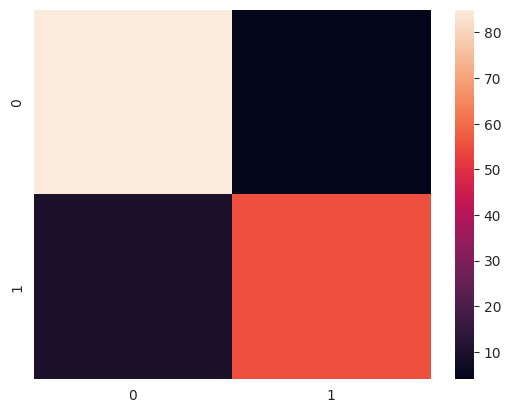

In [64]:
print("Classification Report is:\n",classification_report(Y_test,rf_pred))
sns.heatmap(confusion_matrix(Y_test,rf_pred))

Note that optimizing the hyperparameters did not affect the accuracy scores, the default values produced the same effect.

#9) Naive Bayes

In [40]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [41]:
best_model= nbModel_grid.fit(X_train, Y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [42]:
nb_pred=best_model.predict(X_test)

In [43]:
naiveB_acc= accuracy_score(Y_test,best_model.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,best_model.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,best_model.predict(X_test))*100))

Train Set Accuracy:76.71009771986971
Test Set Accuracy:74.02597402597402


Classification Report is:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79        89
           1       0.76      0.57      0.65        65

    accuracy                           0.74       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.74      0.74      0.73       154



<Axes: >

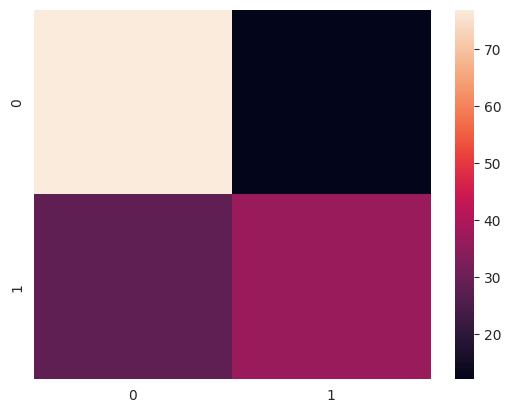

In [65]:
print("Classification Report is:\n",classification_report(Y_test,nb_pred))
sns.heatmap(confusion_matrix(Y_test,nb_pred))

#Comparing Classifiers

In [90]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVM',  'Decision Tree',
             'Gradient Boosting',  'XgBoost','AdaBoost','Random Forest','Naive Bayes'],
    'Score': [ log_acc,knn_acc, svm_acc, dtc_acc, gbc_acc, xgb_acc,ada_acc,rforest_acc,naiveB_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVM,0.935065
7,Random Forest,0.909091
3,Decision Tree,0.889610
4,Gradient Boosting,0.889610
6,AdaBoost,0.889610
5,XgBoost,0.876623
1,KNN,0.831169
0,Logistic,0.740260
8,Naive Bayes,0.740260


<ipython-input-91-fa8d2cacaf2b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models['Model'],y=models['Score'],palette='Accent' )


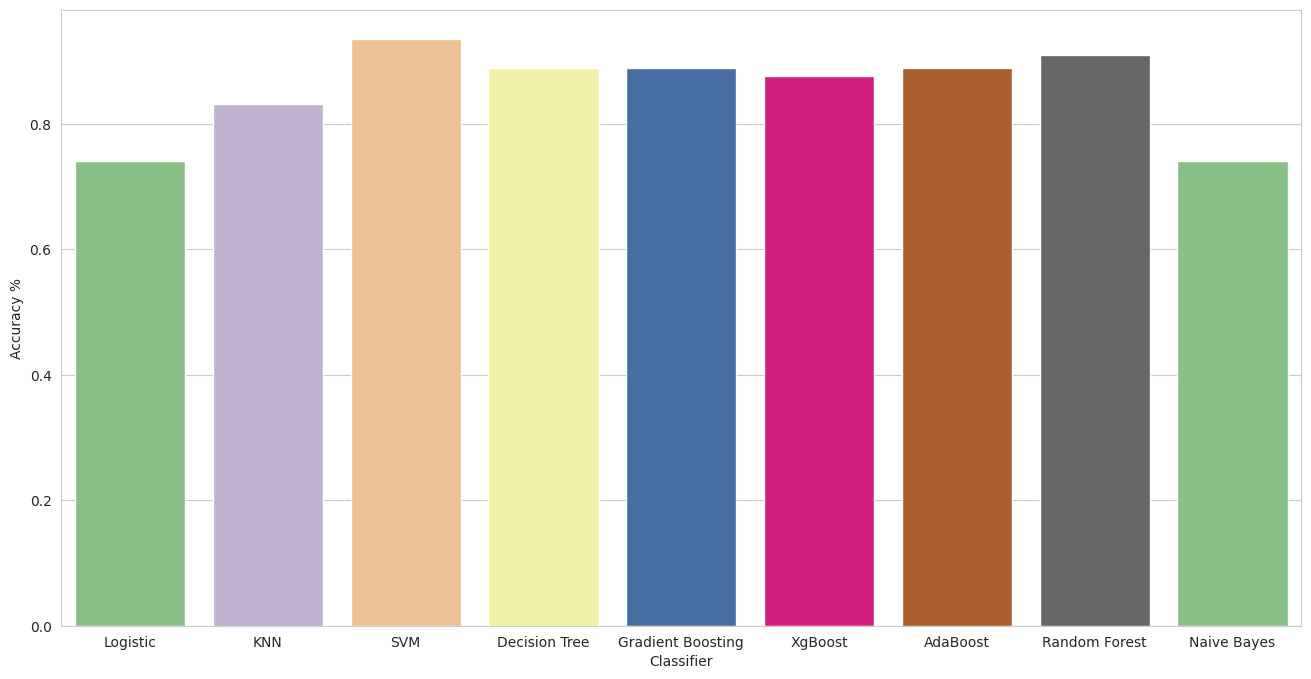

In [91]:

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Classifier")
sns.barplot(x=models['Model'],y=models['Score'],palette='Accent' )
plt.show()

#Comparing the top 3 classifiers

Support Vector Machine showed the highest accuracy scores

Classification Report is:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        89
           1       0.97      0.88      0.92        65

    accuracy                           0.94       154
   macro avg       0.94      0.93      0.93       154
weighted avg       0.94      0.94      0.93       154


 F1:
 0.9193548387096773

 Precision score is:
 0.9661016949152542

 Recall score is:
 0.8769230769230769

 Confusion Matrix:



<Axes: >

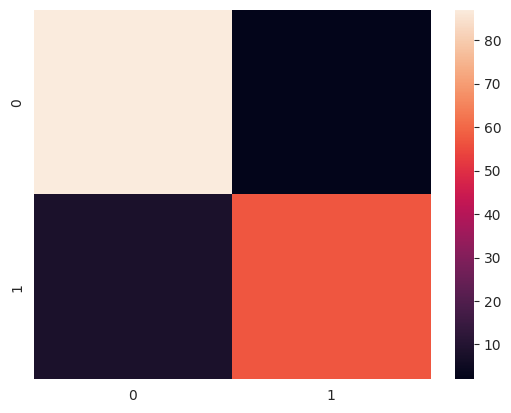

In [47]:
print("Classification Report is:\n",classification_report(Y_test,svm_pred))
print("\n F1:\n",f1_score(Y_test,svm_pred))
print("\n Precision score is:\n",precision_score(Y_test,svm_pred))
print("\n Recall score is:\n",recall_score(Y_test,svm_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(Y_test,svm_pred))

Random Forest was the second highest

Classification Report is:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        89
           1       0.93      0.85      0.89        65

    accuracy                           0.91       154
   macro avg       0.91      0.90      0.91       154
weighted avg       0.91      0.91      0.91       154


 F1:
 0.8870967741935484

 Precision score is:
 0.9322033898305084

 Recall score is:
 0.8461538461538461

 Confusion Matrix:



<Axes: >

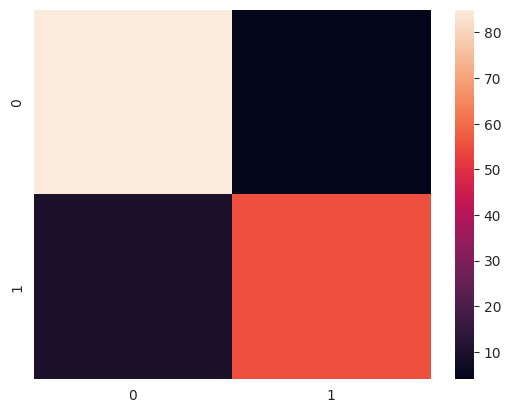

In [48]:
print("Classification Report is:\n",classification_report(Y_test,rf_pred))
print("\n F1:\n",f1_score(Y_test,rf_pred))
print("\n Precision score is:\n",precision_score(Y_test,rf_pred))
print("\n Recall score is:\n",recall_score(Y_test,rf_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(Y_test,rf_pred))

Decision Tree was the third highest

Classification Report is:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91        89
           1       0.90      0.83      0.86        65

    accuracy                           0.89       154
   macro avg       0.89      0.88      0.89       154
weighted avg       0.89      0.89      0.89       154


 F1:
 0.8640000000000001

 Precision score is:
 0.9

 Recall score is:
 0.8307692307692308

 Confusion Matrix:



<Axes: >

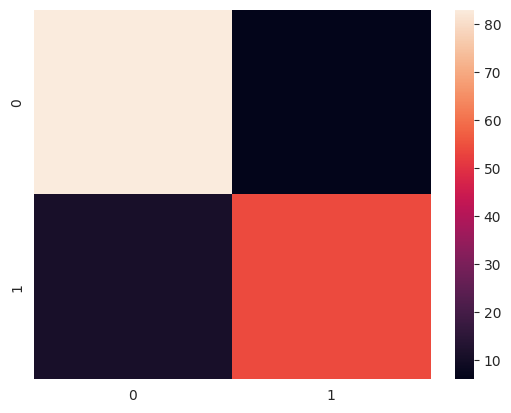

In [49]:
print("Classification Report is:\n",classification_report(Y_test,dt_pred))
print("\n F1:\n",f1_score(Y_test,dt_pred))
print("\n Precision score is:\n",precision_score(Y_test,dt_pred))
print("\n Recall score is:\n",recall_score(Y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(Y_test,dt_pred))

In [83]:
modelspre = pd.DataFrame({
    'Model': [ 'SVM',  'Decision Tree','Random Forest'],
    'Score': [ precision_score(Y_test,svm_pred), precision_score(Y_test,dt_pred), precision_score(Y_test,rf_pred)]
})

modelspre.sort_values(by = 'Score', ascending = False)

,Model,Score
0,SVM,0.966102
2,Random Forest,0.932203
1,Decision Tree,0.900000


<ipython-input-88-46c7e7dd0d97>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelspre['Model'],y=modelspre['Score'],palette='Accent' )


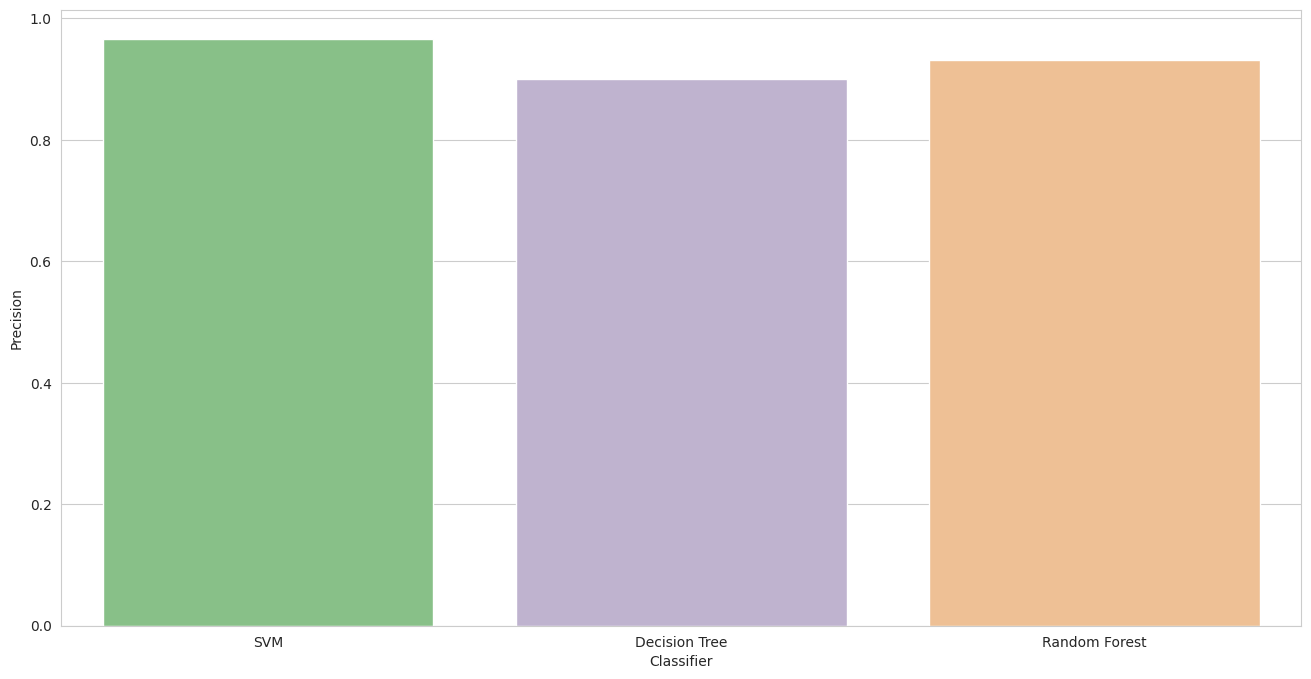

In [88]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Precision")
plt.xlabel("Classifier")
sns.barplot(x=modelspre['Model'],y=modelspre['Score'],palette='Accent' )
plt.show()

In [86]:
modelsrec = pd.DataFrame({
    'Model': [ 'SVM',  'Decision Tree','Random Forest'],
    'Score': [ recall_score(Y_test,svm_pred), recall_score(Y_test,dt_pred), recall_score(Y_test,rf_pred)]
})

modelsrec.sort_values(by = 'Score', ascending = False)

,Model,Score
0,SVM,0.876923
2,Random Forest,0.846154
1,Decision Tree,0.830769


<ipython-input-89-b9b14029ab81>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelsrec['Model'],y=modelsrec['Score'],palette='Accent' )


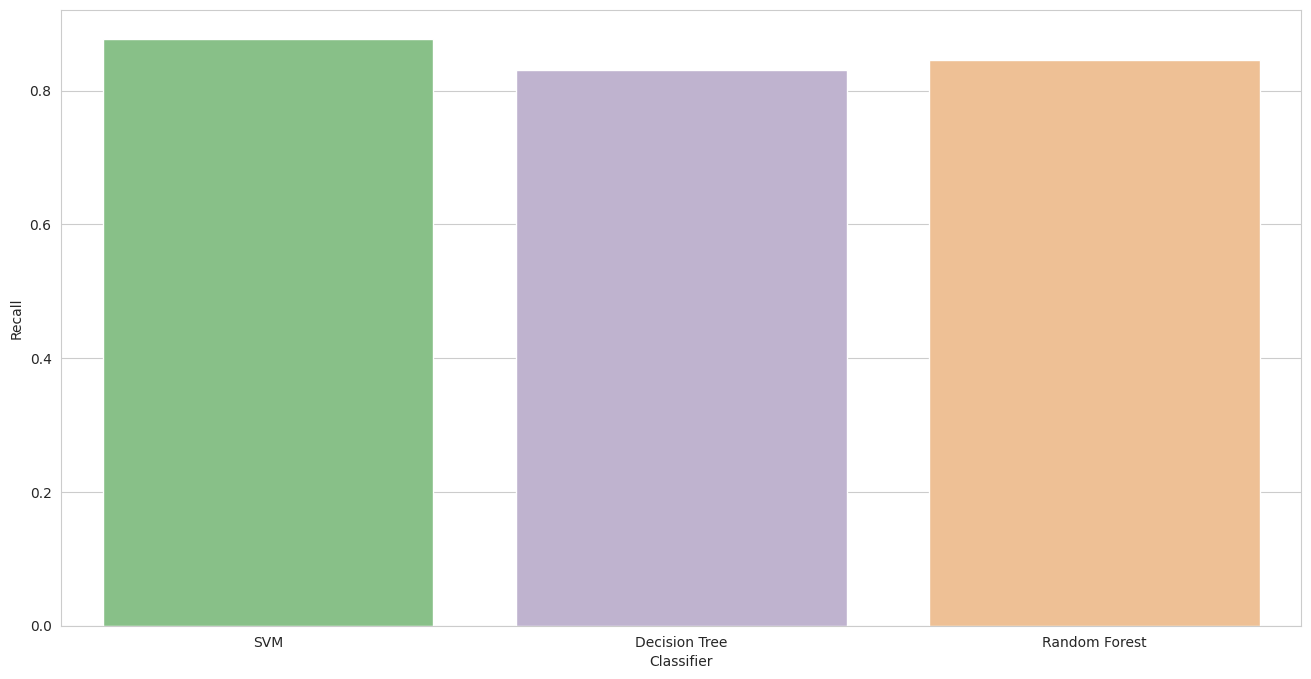

In [89]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Recall")
plt.xlabel("Classifier")
sns.barplot(x=modelsrec['Model'],y=modelsrec['Score'],palette='Accent' )
plt.show()

In [84]:
modelsacc = pd.DataFrame({
    'Model': [ 'SVM',  'Decision Tree','Random Forest'],
    'Score': [ svm_acc, dtc_acc, rforest_acc]
})

modelsacc.sort_values(by = 'Score', ascending = False)

,Model,Score
0,SVM,0.935065
2,Random Forest,0.909091
1,Decision Tree,0.889610


<ipython-input-85-c201f4bace9f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelsacc['Model'],y=modelsacc['Score'],palette='Accent' )


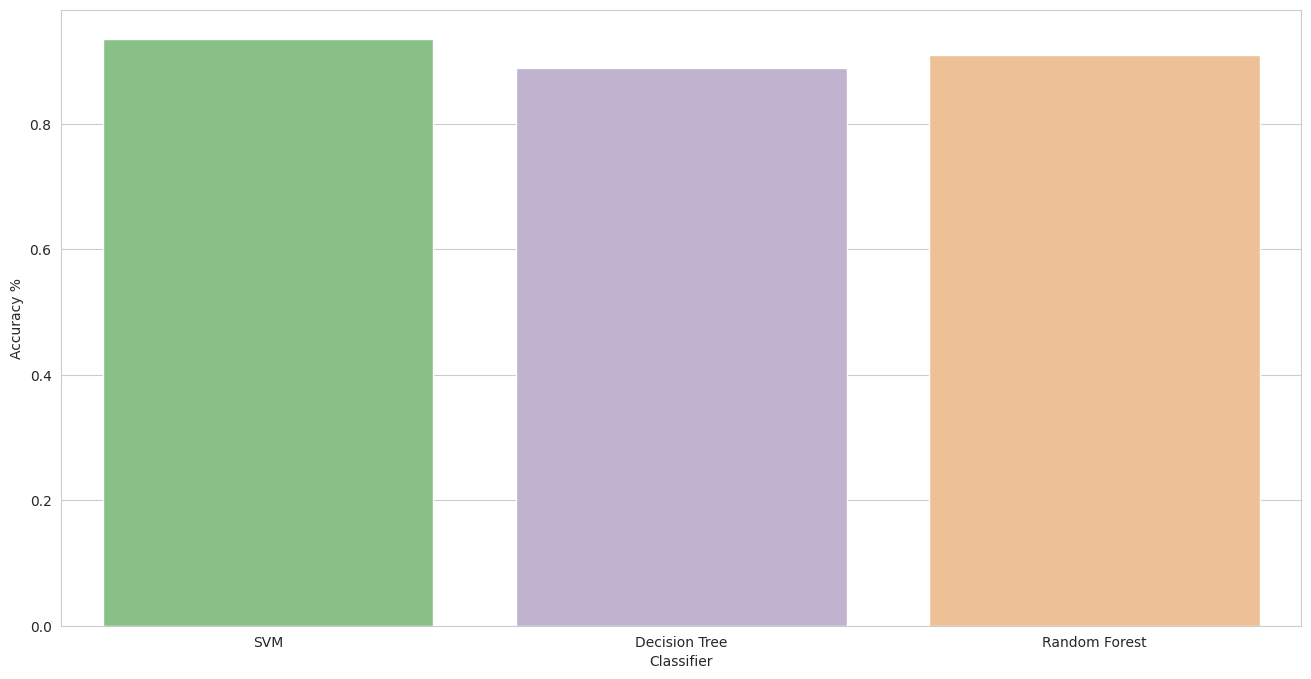

In [85]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Classifier")
sns.barplot(x=modelsacc['Model'],y=modelsacc['Score'],palette='Accent' )
plt.show()